# Matplotlib project

- bar plot: x-number of publications, y-town
- scatter plot: x-longitude, y-latitude, circle-represents single town/address, circle_size-number of publications
- histogram: x-number of publications, y-year of publication, separate for male and female

In [201]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [202]:
df = pd.read_csv("./output.csv")
print(len(df))

268084


# Bar plot

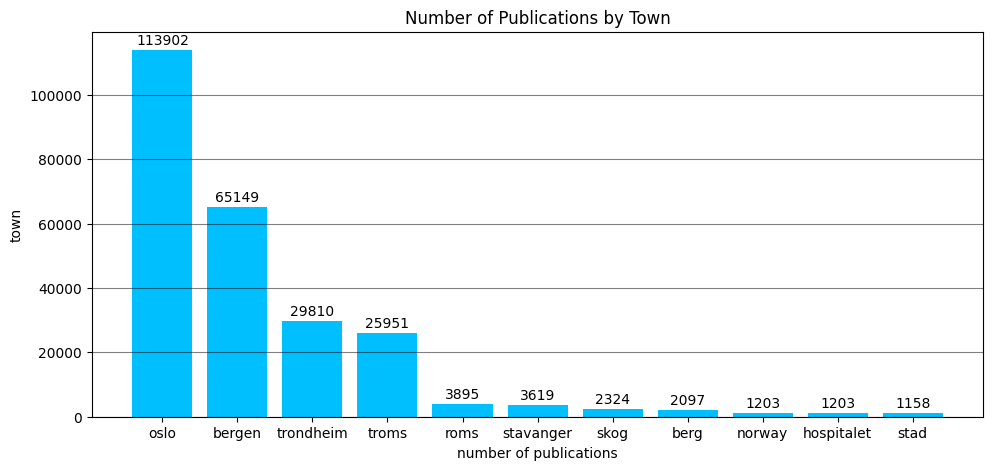

In [203]:
towns_on_plot = 11

publications_per_town = df['town'].value_counts().reset_index().head(towns_on_plot)
publications_per_town.columns = ['town', 'publications']

fig, ax = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(11.5)

ax.set_xlabel("number of publications")
ax.set_ylabel("town")
ax.set_title("Number of Publications by Town")

bars = ax.bar(publications_per_town['town'], publications_per_town['publications'], color='deepskyblue')

ax.grid(axis='y', linestyle='-', alpha=0.5, color="black")

for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
      xy=(bar.get_x() + bar.get_width() / 2, height),
      xytext=(0, 2),
      textcoords="offset points",
      ha='center', va='bottom')
    
plt.show()

## Scatter plot

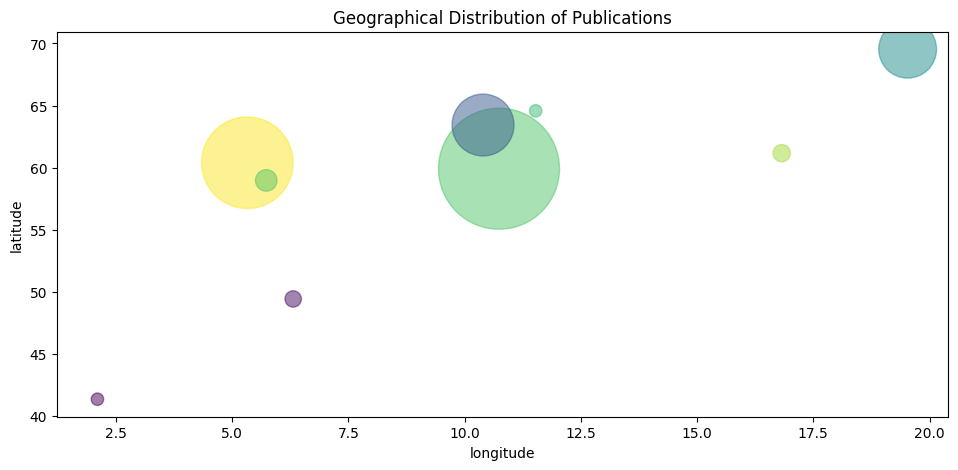

In [204]:
publications_per_town["lat"] = publications_per_town["town"].apply(lambda x: df.loc[df["town"] == x].iloc[0]["lat"])
publications_per_town["lon"] = publications_per_town["town"].apply(lambda x: df.loc[df["town"] == x].iloc[0]["lon"])
publications_per_town = publications_per_town.query("lon >= -20 and lat >= 20")
colors = np.random.rand(len(publications_per_town))

fig, ax = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(11.5)

ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.set_title("Geographical Distribution of Publications")

ax.scatter(publications_per_town["lon"], publications_per_town["lat"], s=publications_per_town["publications"] // 15, c=colors, alpha=0.5)
plt.show()

## Histogram

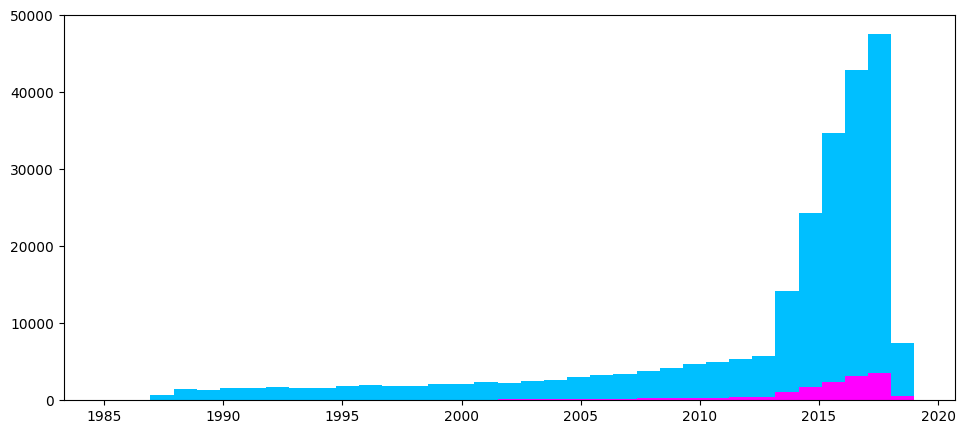

In [205]:
df['gender'] = df['firstname'].apply(lambda x: str(x)[-1] not in ['a'])

fig, ax = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(11.5)

ax.hist(df.query("gender == True and 1985 <= year <= 2024")["year"], bins=35, color="deepskyblue")
ax.hist(df.query("gender == False and 1985 <= year <= 2024")["year"], bins=35, color="magenta")

plt.show()